# Optimization

## Exercise 1.1: Bisection 

One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where:

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  
And so on.

This is bisection, a relative of [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm). It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $. 

Write an implementation of the bisection algorith, `bisect(f, lower=0, upper=1, tol=10e-5)` which, given a function `f`, a lower bound `lower` and an upper bound `upper` finds the point `x` where `f(x) = 0`. The parameter `tol` is a numerical tolerance, you should stop once your step size is smaller than `tol`.


Use it to minimize the function:

$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

in python: `lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1`

The value where f(x) = 0 should be around `0.408`

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# exercise 1.1
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1

# Entry conditions for a Bisection function:
# => It works for all sufficiently well behaved increasing continuous functions with  𝑓(𝑎)<0<𝑓(𝑏)
# In any other case the Bisection function wouldn't work
# So we have to make sure the extrimities of the searched Range signs are opposite +/-

# ALGO:
# x range is divided by 2 at each reccursion
# m is the half of the previous range: (upper-lower)/2
# if f( lower) sign SAME as f(m) sign
# it means we go in the same direction, and lower=m 
# otherwise,
# we go on the other half of the range, and upper=m


def bisect(f, lower=0, upper=1, tol=10e-5): 
    
    m = (lower + upper)/2
    
    if np.abs(f(m)) < tol:
        return m
    
    elif np.sign(f(upper)) == np.sign(f(m)):
        return bisect(f, lower, m, tol)
    elif np.sign(f(lower)) == np.sign(f(m)):
        return bisect(f, m, upper, tol)
    
    
print(bisect(f))
    

0.408294677734375


In [ ]:
x = 0.408
#x = np.linspace(-5,5, 100)
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
f(x)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
#ax.axhline(0, color='k')
ax.plot(x, f(x))
ax.set_xlim(-5, 5)
plt.show() 

## Exercise 1.2: (BONUS-STRETCH 👹)  Recursive Bisect

Write a recursive version of the bisection algorithm

In [ ]:
# exercise 1.2


## Exercise 2.1: Movies Regression

Write the best linear regression model you can on the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv) to predict the profitability of a movie (revenue - budget). Maintain the interpretability of the model.

Few notes:

1. Clean your data! Movies where the budget or revenue are invalid should be thrown out
2. Be creative with feature engineering. You can include processing to one-hot encode the type of movie, etc.
3. The model should be useful for someone **who is thinking about making a movie**. So features like the popularity can't be used. You could, however, use the ratings to figure out if making "good" or "oscar bait" movies is a profitable strategy.

In [1]:
# exercise 2.1

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pld
import seaborn as sns
import sqlite3

import matplotlib.pyplot as plt 
import numpy as np 

from statsmodels.formula.api import ols
import pandas as pd
from patsy import dmatrices


import scipy.stats as sc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


import seaborn as sns 

import statsmodels.api as sm



from sklearn.linear_model import LinearRegression




sns.set()

In [2]:
target_wd = '/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps/DATA_ENGINEERING/ds-data-engineering-P1-optimization-main/_workshop/data'
os.chdir(target_wd)
os.getcwd()


'/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps/DATA_ENGINEERING/ds-data-engineering-P1-optimization-main/_workshop/data'

In [4]:

# DATABASE CREATION and connection to: 'baseballDB.sqlite'
#conn = sqlite3.connect(os.getcwd()+'/movieDB.sqlite') 
#c = conn.cursor()

In [3]:
dfs = {}
def make_dfs_n_tables(dir_name = os.getcwd()):
    for file in os.listdir(dir_name):
        path = os.path.join(dir_name, file)
        if os.path.isfile(path) and (path[-4:]=='.csv'):
            # Get the DF
            df = pd.read_csv(path, header=0)
            dfs[file[:-4]]=df
            
            # Create Table from the DF into the baseballDB.sqlite
            #try:
                
            #    df.to_sql(file[:-4],con=conn,index=False,if_exists='replace')
            #    print(f"{file[:-4]} : table creation successful")
            #except Error as e:
            #    print("The error % occurred.".format(e))
            

In [4]:
make_dfs_n_tables()
print(dfs.keys())

/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_27889/1162983721.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, header=0)


dict_keys(['links_small', 'links', 'credits', 'movies_metadata', 'ratings', 'ratings_small', 'keywords'])


In [5]:
#dfs['links_small'].info()
#dfs['links'].info()
#dfs['credits'].info()
dfs['movies_metadata'].info()
#dfs['ratings'].info()
#dfs['ratings_small'].info()
#dfs['keywords'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
#dfs['links_small']
#dfs['links']
#dfs['credits']
dfs['movies_metadata']
#dfs['ratings']
#dfs['ratings_small']
#dfs['keywords']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [7]:
dfs['movies_metadata'].columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [8]:
dfs['movies_metadata'].genres.unique()

array(["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
       ...,
       "[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, 'name': 'Action'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 28, 'name': 'Action'}, {'id': 9648, 'name': 'Mystery'}, {'id': 53, 'name': 'Thriller'}, {'id': 27, 'name': 'Horror'}]",
       "[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]"],
      dtype=object)

In [9]:
# FEATURES : we can not use features post movie release like vote, popularity, etc..
# let's use Features pre-movie release
# 1- X: our independant variables will be based on:
# - production_companies
# - genres
# - runtime
# - production_countries
# 2- Y: our dependant variable will be the profit = Revenue - Budget

In [10]:
# DF PREP and CLEAN UP
df = dfs['movies_metadata']
df = df.dropna()
df['budget']=df['budget'].astype(float)
df['genres']=df['genres'].convert_dtypes(convert_string=True)
df['production_countries']=df['production_countries'].convert_dtypes(convert_string=True)

print(df['revenue'].isnull().sum())
print(df['budget'].isnull().sum())
print(df['genres'].isnull().sum())
print(df['production_countries'].isnull().sum())

print(df['revenue'].info())
print(df['budget'].info())
print(df['genres'].info())
print(df['production_countries'].info())



0
0
0
0
<class 'pandas.core.series.Series'>
Int64Index: 693 entries, 9 to 45029
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
693 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 693 entries, 9 to 45029
Series name: budget
Non-Null Count  Dtype  
--------------  -----  
693 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 693 entries, 9 to 45029
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
693 non-null    string
dtypes: string(1)
memory usage: 10.8 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 693 entries, 9 to 45029
Series name: production_countries
Non-Null Count  Dtype 
--------------  ----- 
693 non-null    string
dtypes: string(1)
memory usage: 10.8 KB
None


/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_27889/376620373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget']=df['budget'].astype(float)
/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_27889/376620373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres']=df['genres'].convert_dtypes(convert_string=True)
/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_27889/376620373.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [11]:
df['profit']= df['revenue']-df['budget']

df['profit'].info()


<class 'pandas.core.series.Series'>
Int64Index: 693 entries, 9 to 45029
Series name: profit
Non-Null Count  Dtype  
--------------  -----  
693 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_27889/941793608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit']= df['revenue']-df['budget']


In [12]:
from ast import literal_eval

def get_production_countries(x):
    x_list = literal_eval(x) #reading the list inside the string
    for dic in x_list: # only 1 list, 1 iteration
        key = 'iso_3166_1'
        value = dic.get(key, 0)
        if value != 0:
            return value
        
def get_genres(x):
    x_list = literal_eval(x) #reading the list inside the string
    for dic in x_list: 
        key = 'name'
        value = dic.get(key, 0)
        if value != 0:
            return value



In [13]:

df['country']= df['production_countries'].apply(get_production_countries)
df['genre_']= df['genres'].apply(get_genres)

/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_27889/422287844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country']= df['production_countries'].apply(get_production_countries)
/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_27889/422287844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_']= df['genres'].apply(get_genres)


In [14]:

df = df.dropna()
df['country'].unique()

array(['GB', 'US', 'JP', 'SN', 'FR', 'IT', 'AU', 'BS', 'CA', 'DE', 'CN',
       'NZ', 'HK', 'CZ', 'DK', 'MX', 'KR', 'RU', 'BR', 'ES', 'TH', 'NO',
       'SE', 'FI', 'IN', 'NL', 'ZA', 'AE', 'ID', 'MA', 'BE', 'AT', 'BG',
       'RO', 'HU'], dtype=object)

In [15]:
df['genre_'].unique()

array(['Adventure', 'Comedy', 'Horror', 'Action', 'Animation', 'Family',
       'Science Fiction', 'Romance', 'Drama', 'Thriller', 'Western',
       'Crime', 'Fantasy', 'Documentary', 'Mystery', 'War', 'Music',
       'TV Movie'], dtype=object)

In [16]:
df['title']=df['title'].convert_dtypes(convert_string=True)
df['country']=df['country'].convert_dtypes(convert_string=True)
df['genre_']=df['genre_'].convert_dtypes(convert_string=True)
df[['title','runtime', 'revenue', 'budget', 'profit', 'country', 'genre_']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 9 to 45029
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    682 non-null    string 
 1   runtime  682 non-null    float64
 2   revenue  682 non-null    float64
 3   budget   682 non-null    float64
 4   profit   682 non-null    float64
 5   country  682 non-null    string 
 6   genre_   682 non-null    string 
dtypes: float64(4), string(3)
memory usage: 42.6 KB


In [17]:
# Our new base DF is the following. 
# We just need to get the dummy values from the categorical features
df = df[['title','runtime', 'profit', 'country', 'genre_']].reset_index(drop=True)
df

,title,runtime,profit,country,genre_
0,GoldenEye,130.0,294194034.0,GB,Adventure
1,Friday,91.0,24715918.0,US,Comedy
2,From Dusk Till Dawn,108.0,6836616.0,US,Horror
3,Blue in the Face,83.0,-725000.0,US,Comedy
4,Mighty Morphin Power Rangers: The Movie,92.0,51000000.0,JP,Action
...,...,...,...,...,...
677,War for the Planet of the Apes,140.0,217907963.0,CA,Drama
678,Goon: Last of the Enforcers,101.0,0.0,CA,Comedy
679,Pokémon: Spell of the Unknown,93.0,52411275.0,JP,Adventure
680,Transformers: The Last Knight,149.0,344942143.0,US,Action


In [18]:
list_to_dummy = ['country','genre_']

In [19]:
for col in list_to_dummy:
    df = df.join(pd.get_dummies(df[col], drop_first=False, prefix=col)) # Automate get dummies for each categorical col    df = df.merge(pd.get_dummies(df[col], drop_first=False, prefix=col)) # Automate get dummies for each categorical col

In [20]:
# CLEAN DF
df = df.drop(list_to_dummy, axis=1)
df

,title,runtime,profit,country_AE,country_AT,country_AU,country_BE,country_BG,country_BR,country_BS,...,genre__Fantasy,genre__Horror,genre__Music,genre__Mystery,genre__Romance,genre__Science Fiction,genre__TV Movie,genre__Thriller,genre__War,genre__Western
0,GoldenEye,130.0,294194034.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Friday,91.0,24715918.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,From Dusk Till Dawn,108.0,6836616.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Blue in the Face,83.0,-725000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mighty Morphin Power Rangers: The Movie,92.0,51000000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,War for the Planet of the Apes,140.0,217907963.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678,Goon: Last of the Enforcers,101.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,Pokémon: Spell of the Unknown,93.0,52411275.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
680,Transformers: The Last Knight,149.0,344942143.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y = df[['profit']].copy()

In [22]:
x = df.copy()
x = x.drop(['title','profit'],axis=1)



In [23]:
X = sm.add_constant(x) 
model = sm.OLS(y, X).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     7.637
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           3.91e-40
Time:                        17:32:56   Log-Likelihood:                -14065.
No. Observations:                 682   AIC:                         2.824e+04
Df Residuals:                     629   BIC:                         2.848e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -5.66e+08   5.76e+07     -9.833      0.000   -6.79e+08   -4.53e+08
runtime                  5.95e+06   4.58e+05     12.992      0.000    5.05e+06    6.85e+06
country_AE              3.128e+07   1.59e+08      0.196      0.844   -2.82e+08    3.44e+08
country_AT             -1.329e+08   2.25e+08     -0.591      0.555   -5.74e+08    3.08e+08
country_AU             -7.326e+05   7.61e+07     -0.010      0.992    -1.5e+08    1.49e+08
country_BE              6.294e+07   2.29e+08      0.275      0.783   -3.86e+08    5.12e+08
country_BG              5.077e+07   2.24e+08      0.227      0.821   -3.88e+08     4.9e+08
country_BR              1.319e+07   1.32e+08      0.100      0.920   -2.46e+08    2.72e+08
country_BS             -1.802e+08   2.24e+08     -0.804      0.422   -6.21e+08     2.6e+08
country_CA              3.152e+07   5.04e+07      0.625      0.532   -6.75e+07    1.31e+08
country_CN              4.503e+07    7.7e+07      0.585      0.559   -1.06e+08    1.96e+08
country_CZ              3.121e+07   1.31e+08      0.238      0.812   -2.27e+08    2.89e+08
country_DE              4.704e+07   5.35e+07      0.879      0.380    -5.8e+07    1.52e+08
country_DK              -4.31e+07   1.03e+08     -0.418      0.676   -2.45e+08    1.59e+08
country_ES              4.556e+07   9.58e+07      0.475      0.635   -1.43e+08    2.34e+08
country_FI              9.279e+06   1.32e+08      0.070      0.944    -2.5e+08    2.68e+08
country_FR              -2.31e+06   6.53e+07     -0.035      0.972   -1.31e+08    1.26e+08
country_GB              5.898e+07    3.9e+07      1.511      0.131   -1.77e+07    1.36e+08
country_HK             -1.086e+08   1.03e+08     -1.056      0.291   -3.11e+08    9.33e+07
country_HU              1.159e+07   2.29e+08      0.051      0.960   -4.37e+08     4.6e+08
country_ID             -1.781e+08   1.31e+08     -1.355      0.176   -4.36e+08    8.01e+07
country_IN             -2.255e+08   7.05e+07     -3.196      0.001   -3.64e+08   -8.69e+07
country_IT             -7.843e+07   1.33e+08     -0.588      0.557    -3.4e+08    1.83e+08
country_JP             -1.146e+08   4.65e+07     -2.463      0.014   -2.06e+08   -2.32e+07
country_KR             -5.555e+07   1.61e+08     -0.345      0.731   -3.72e+08    2.61e+08
country_MA               1.73e+08    2.3e+08      0.752      0.452   -2.79e+08    6.25e+08
country_MX             -2.061e+08   2.24e+08     -0.921      0.357   -6.45e+08    2.33e+08
country_NL             -6.565e+07   1.59e+08     -0.412      0.681   -3.79e+08    2.47e+08
country_NO              4.893e+07   1.32e+08      0.371      0.711    -2.1e+08    3.08e+08
country_NZ              2.078e+08   9.22e+07      2.254      0.025    2.68e+07    3.89e+08
country_RO              8.135e+07   2.25e+08      0.362      0.718    -3.6e+08  

In [25]:
# We only keep the relevant Pvalues coefficients:
drop_coef_list=['country_AE','country_AT','country_AU','country_BE','country_BG','country_BR','country_BS','country_CA','country_CN','country_CZ','country_DE','country_DK','country_ES','country_FI','country_FR','country_GB','country_HK','country_HU','country_ID','country_IT','country_KR','country_MA','country_MX','country_NL','country_NO','country_RO','country_RU','country_SE','country_SN','country_TH','country_ZA','genre__Comedy','genre__Crime','genre__Fantasy','genre__Horror','genre__Music','genre__Mystery','genre__Romance','genre__Science Fiction','genre__TV Movie','genre__Thriller','genre__War']
X = X.drop(drop_coef_list,axis=1)

In [26]:
model = sm.OLS(y, X).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     32.65
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.72e-59
Time:                        17:32:56   Log-Likelihood:                -14075.
No. Observations:                 682   AIC:                         2.818e+04
Df Residuals:                     669   BIC:                         2.823e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.755e+08   4.87e+07    -11.825      0.000   -6.71e+08    -4.8e+08
runtime             6.013e+06   4.27e+05     14.094      0.000    5.18e+06    6.85e+06
country_IN         -2.479e+08   6.75e+07     -3.672      0.000    -3.8e+08   -1.15e+08
country_JP         -1.289e+08   4.13e+07     -3.123      0.002    -2.1e+08   -4.79e+07
country_NZ          1.804e+08   8.95e+07      2.015      0.044     4.6e+06    3.56e+08
country_US           1.06e+08   1.96e+07      5.402      0.000    6.75e+07    1.45e+08
genre__Action       8.807e+07   2.31e+07      3.820      0.000    4.28e+07    1.33e+08
genre__Adventure    1.348e+08   2.72e+07      4.965      0.000    8.15e+07    1.88e+08
genre__Animation    2.382e+08   3.39e+07      7.022      0.000    1.72e+08    3.05e+08
genre__Documentary -1.171e+08   5.62e+07     -2.084      0.038   -2.27e+08   -6.76e+06
genre__Drama       -6.119e+07   3.31e+07     -1.846      0.065   -1.26e+08    3.89e+06
genre__Family       2.085e+08   5.12e+07      4.073      0.000    1.08e+08    3.09e+08
genre__Western     -4.938e+08   2.26e+08     -2.184      0.029   -9.38e+08   -4.99e+07
==============================================================================
Omnibus:                      393.895   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5206.514
Skew:                           2.314   Prob(JB):                         0.00
Kurtosis:                      15.720   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Among the features that will increase the profit of a movie are, (ordered by their coefficient ):
#    -FEATURE-                                      -Coef-    -Std Err-
# - genre__Animation                               2.382e+08	 3.39e+07
# - genre__Family                                  2.085e+08	5.12e+07
# - production_country : country_NZ : New Zealand  1.804e+08 	 8.95e+07
# - genre__Adventure                               1.348e+08	2.72e+07
# - production_country : country_US : USA           1.06e+08	 1.96e+07
# - genre__Action                                   8.807e+07	2.31e+07
# - runtime                                         6.013e+06	4.27e+05




In [29]:
X.shape

(682, 13)

In [30]:
# Let's plot the most influential Feature: genre__Animation:

# Prepare the ranges for runtime
genre__Animation_min = X['genre__Animation'].min()
genre__Animation_max = X['genre__Animation'].max()

genre__Animation_range = np.linspace(genre__Animation_min,genre__Animation_max,682)


In [31]:
# Average all the Features except for 
X_ = X.copy()
for col in X_[1:]:
    X_[col] = X_[col].mean()

In [32]:
X_ = X_.drop('genre__Animation',axis=1)
X_.insert(8,'genre__Animation',genre__Animation_range)


In [33]:
X_

,const,runtime,country_IN,country_JP,country_NZ,country_US,genre__Action,genre__Adventure,genre__Animation,genre__Documentary,genre__Drama,genre__Family,genre__Western
0,1.0,107.080645,0.017595,0.052786,0.010264,0.618768,0.244868,0.156891,0.000000,0.024927,0.08651,0.030792,0.001466
1,1.0,107.080645,0.017595,0.052786,0.010264,0.618768,0.244868,0.156891,0.001468,0.024927,0.08651,0.030792,0.001466
2,1.0,107.080645,0.017595,0.052786,0.010264,0.618768,0.244868,0.156891,0.002937,0.024927,0.08651,0.030792,0.001466
3,1.0,107.080645,0.017595,0.052786,0.010264,0.618768,0.244868,0.156891,0.004405,0.024927,0.08651,0.030792,0.001466
4,1.0,107.080645,0.017595,0.052786,0.010264,0.618768,0.244868,0.156891,0.005874,0.024927,0.08651,0.030792,0.001466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.0,107.080645,0.017595,0.052786,0.010264,0.618768,0.244868,0.156891,0.994126,0.024927,0.08651,0.030792,0.001466
678,1.0,107.080645,0.017595,0.052786,0.010264,0.618768,0.244868,0.156891,0.995595,0.024927,0.08651,0.030792,0.001466
679,1.0,107.080645,0.017595,0.052786,0.010264,0.618768,0.244868,0.156891,0.997063,0.024927,0.08651,0.030792,0.001466
680,1.0,107.080645,0.017595,0.052786,0.010264,0.618768,0.244868,0.156891,0.998532,0.024927,0.08651,0.030792,0.001466


In [34]:
model_ = sm.OLS(y, X).fit()
y_pred = model_.predict(X_) 



In [35]:
model_.params

const                -5.754686e+08
runtime               6.013232e+06
country_IN           -2.478926e+08
country_JP           -1.288976e+08
country_NZ            1.803728e+08
country_US            1.059864e+08
genre__Action         8.806746e+07
genre__Adventure      1.348053e+08
genre__Animation      2.381822e+08
genre__Documentary   -1.170892e+08
genre__Drama         -6.119114e+07
genre__Family         2.085347e+08
genre__Western       -4.938482e+08
dtype: float64

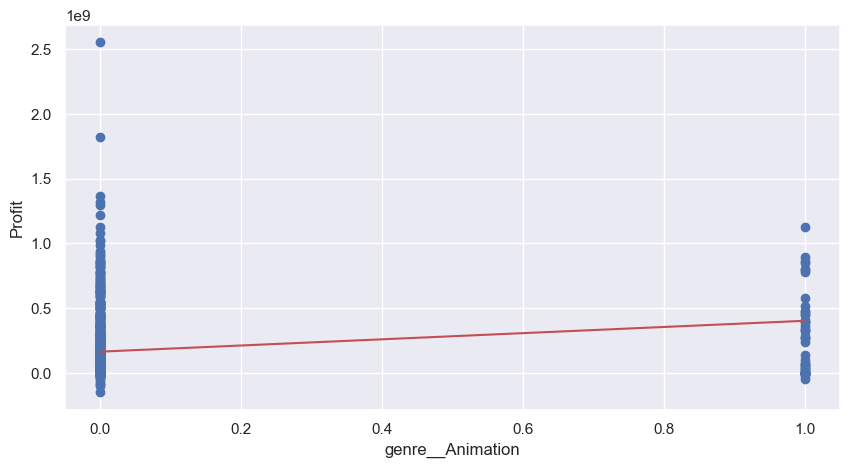

In [36]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.scatter(X['genre__Animation'], y, color='b')
ax1.plot(X_['genre__Animation'], y_pred, 'r')
plt.xlabel('genre__Animation')
plt.ylabel('Profit')
plt.show()

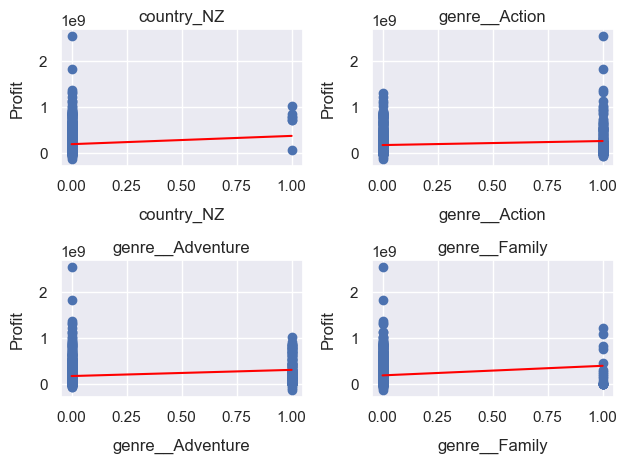

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
#y2_predictions = model2.predict(xp)


def df_prep(feature, df):
    min_ft = df[feature].min()
    max_ft = df[feature].max()
    count = len(df[feature])
    rng_ft = np.linspace(min_ft,max_ft,count)
    rng_ft_2 = rng_ft**2

    for col in df[1:]:
        df[col] = df[col].mean()
    #Positions:
    ft_pos = list(df.columns).index(feature)
    # ft_pos_2 = list(df.columns).index(feature+'^2')
    
    df = df.drop(feature,axis=1)
    df.insert(ft_pos,feature,rng_ft)
   
    
    #df = df.drop(feature+'^2',axis=1)
    #df.insert(ft_pos_2,feature+'^2',rng_ft_2)

    
    #also return the specific model
#    model_spec = sm.OLS(y, df).fit()
    model_spec = sm.OLS(y, X).fit()
    y_pred_spec = model_spec.predict(df)
    
    return df, y_pred_spec
    


def reg_plot_on_ax(feature, ax):

    
    df, y_pred_spec = df_prep(feature, X.copy())
    
    
    #sns.scatterplot(x=str(feature), y=y, data=df, ax=ax)
    #sns.lineplot(x=df[feature], y=y_pred_spec, color='r', ax=ax)
    
    ax.scatter(X[feature], y, color='b')
    ax.plot(df[feature], y_pred_spec, color='red')
    ax.set_title(feature)
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel('Profit', labelpad=10)


list_ft = ['country_NZ', 'genre__Action', 'genre__Adventure', 'genre__Family']
axes = [ax1, ax2, ax3, ax4]  
              
for ft, ax in zip(list_ft,axes):
    reg_plot_on_ax(ft, ax)
plt.tight_layout()

## Exercise 2.2: Movies Manual Regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using the normal equation $(X^T X)^{-1}X^Ty$.

Verify that the coefficients are the same.

In [40]:
# exercise 2.2
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

beta

array([[-5.75468607e+08],
       [ 6.01323202e+06],
       [-2.47892553e+08],
       [-1.28897587e+08],
       [ 1.80372809e+08],
       [ 1.05986408e+08],
       [ 8.80674591e+07],
       [ 1.34805307e+08],
       [ 2.38182241e+08],
       [-1.17089249e+08],
       [-6.11911431e+07],
       [ 2.08534656e+08],
       [-4.93848156e+08]])

In [39]:
model.params

const                -5.754686e+08
runtime               6.013232e+06
country_IN           -2.478926e+08
country_JP           -1.288976e+08
country_NZ            1.803728e+08
country_US            1.059864e+08
genre__Action         8.806746e+07
genre__Adventure      1.348053e+08
genre__Animation      2.381822e+08
genre__Documentary   -1.170892e+08
genre__Drama         -6.119114e+07
genre__Family         2.085347e+08
genre__Western       -4.938482e+08
dtype: float64

In [ ]:
# The coefficient are the same 